# EDA validation 

In [1]:
import pandas as pd
from recsysUtility import RecSysUtility
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np

/home/andreafiandro/.local/lib/python3.8/site-packages/dask/array/random.py:25: FutureWarning: dask.array.random.doc_wraps is deprecated and will be removed in a future version
  warnings.warn(


## Carico il dataset e pulisco le colonne

In [2]:
rsUtils = RecSysUtility('/home/andreafiandro/NAS/training.tsv')

In [3]:
df_val = pd.read_csv('/home/andreafiandro/NAS/val.tsv', sep='\u0001', header=None, nrows=1000000)
df_val = rsUtils.process_chunk_tsv(df_val, isVal=True)

## Overview dei dati

In [4]:
print ('Test shape',  df_val.shape)

Test shape (100000, 20)


In [27]:
df_val['Text_tokens_count'] = df_val['Text_tokens'].apply(lambda x: len(x.split('|')))
df_val['Hashtags'] = df_val['Hashtags'].astype('str').apply(lambda x: len(x.split('|'))-1)
df_val.head()

,Text_tokens,Hashtags,Tweet_id,Present_media,Present_links,Present_domains,Tweet_type,Language,Timestamp,User_id,...,Following_count,Is_verified,Account_creation_time,User_id_engaging,Follower_count_engaging,Following_count_engaging,Is_verified_engaging,Account_creation_time_engaging,Engagee_follows_engager,Text_tokens_count
0,101|47185|10157|100986|10343|55422|119|14120|1...,0,7647B4E9DAF4C1D8973397DC2A04F3E3,Photo,0,0,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581703126,8A9AB92B775C62C4AB60DF6773A01571,...,1216,0,1448292186,0000006C3074607050F1339DDCB890BB,27448,600,0,1520948869,True,26
1,101|56898|137|10730|107105|59578|17394|17394|1...,0,408DB1803264B5FF55F73EC06BE9BD77,Photo|Photo|Photo|Photo,0,0,Retweet,B9175601E87101A984A50F8A62A1C374,1582021842,825B003667DF15692B1704F44DAFD1A2,...,100,0,1263078566,000013315386492275CCBF7AEF293EF0,139,956,0,1335110299,False,28
2,101|16735|11584|131|14120|131|120|120|188|119|...,0,2EE951379C47E8BF62EABB8FA027F753,GIF,0,0,TopLevel,2996EB2FE8162C076D070A4C8D6532CD,1581734918,2DEC09796D0EB473244CB7A4FB13A0A0,...,1,0,1356488269,00001569CB28972FC8173122D9DA162F,16,97,0,1503940711,False,20
3,101|56898|137|12127|43213|10245|168|10215|1011...,0,2135F24B05DAE3EF213F9CE80FDC6DAF,Photo|Photo|Photo,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581913613,487BCB8F1677A6D9EEE612940410CBB6,...,406,0,1449096567,00001607209C5774DF9207A2AC0EED5F,460,693,0,1396311956,True,39
4,101|11101|42780|10741|11222|10197|15304|10106|...,0,09143FEDE9BD494A6EA9A7EE160565E3,Photo,0,0,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581565745,C85C39DC8D279E51DF1BBF0391E5EB2E,...,273,1,1236181798,0000177705514C315F2FC6DFA3872712,468,3837,0,1298646801,False,27


### Quanti valori NaN ci sono?

In [6]:
# Controllo quanti NaN ci sono
pd.DataFrame(df_val.isnull().sum(axis=0).head(20)).T

,Text_tokens,Hashtags,Tweet_id,Present_media,Present_links,Present_domains,Tweet_type,Language,Timestamp,User_id,Follower_count,Following_count,Is_verified,Account_creation_time,User_id_engaging,Follower_count_engaging,Following_count_engaging,Is_verified_engaging,Account_creation_time_engaging,Engagee_follows_engager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Quanti sono i valori unici per ogni variabile?

In [7]:
feats_counts = df_val.nunique(dropna = False)
pd.DataFrame(feats_counts.sort_values()).T

,Is_verified_engaging,Is_verified,Engagee_follows_engager,Tweet_type,Present_media,Hashtags,Language,Text_tokens_count,Following_count_engaging,Follower_count_engaging,...,Present_domains,Follower_count,Present_links,Timestamp,Account_creation_time,User_id,Text_tokens,Account_creation_time_engaging,User_id_engaging,Tweet_id
0,2,2,2,3,14,36,64,310,17391,31655,...,60351,240688,376481,597647,1594223,1598197,2822955,2899759,2915443,3226722


# Analisi singole features

## Hashtag

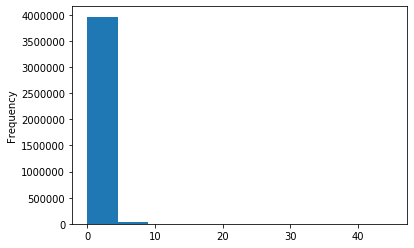

In [8]:
df_val['Hashtags'].plot(kind='hist')

## Text tokens

### Text_tokens

In [9]:
#df_val['Text_tokens'] = df_val['Text_tokens'].apply(lambda x: '|'.join(sorted(x.split('|'))))
pd.DataFrame(df_val['Text_tokens'].value_counts())

,Text_tokens
101|100|102,14976
101|102,768
101|9670|27023|61439|9568|119081|31503|137|118|137|106|114|14120|131|120|120|188|119|11170|120|171|12396|11403|10107|10884|10686|10350|10858|10638|102,411
101|9426|12508|25503|14120|131|120|120|188|119|11170|120|147|13520|11703|11565|13034|14703|11779|90772|102,399
101|13646|112|187|11590|142|83821|14120|131|120|120|188|119|11170|120|10608|12022|10237|11703|11259|11166|78043|11447|102,385
...,...
101|5667|1963|4470|1920|37133|60907|51143|15221|1882|119|119|3460|1923|5667|1962|47359|15802|1881|119|119|95154|100|3330|1906|1882|119|4476|3740|1943|3330|1906|1882|119|6461|82104|15355|119|2072|7168|1966|5760|7237|5318|1923|11312|1890|2329|1881|6180|4497|11592|14725|16867|6224|3446|7069|1915|1891|14813|10083|119|3235|1946|3350|15137|8462|1963|10083|119|6224|3446|7069|1915|18628|28224|1882|1929|111795|15752|111786|1882|119|5949|1940|2527|1911|48176|16867|19512|3770|1946|2195|2149|2222|31216|111822|21761|14803|99172|3820|12290|45714|2196|1946|3350|1940|6180|4497|11592|20058|10634|10083|119|119|100|2146|7165|1939|13894|22445|10055|102,1
101|100|784|11832|759|37548|12497|59901|35849|28241|10564|775|66709|49752|106803|26422|781|36334|10382|788|48711|23926|791|39197|37560|10382|784|11832|791|26897|10765|14695|791|10582|64488|789|82397|11832|13879|31898|54252|11693|769|21034|28089|10429|755|775|10502|36793|10961|59901|35849|49170|13154|59901|46240|16526|784|16498|30394|764|15909|59219|14695|791|39260|102211|787|82225|52516|793|29732|38116|11341|65968|33807|786|42519|10382|59901|72169|10765|11917|26213|13879|77198|10382|24738|791|26341|107852|26422|48486|787|91812|59901|37548|10700|79887|16333|90765|34707|119|119|119|108|100800|14695|168|21556|168|781|57008|10429|14120|131|120|120|188|119|11170|120|190|12022|10686|99808|10418|82678|10237|10237|102,1
101|10190|10182|10854|57646|10107|193|10104|10109|16488|89729|10126|86521|102,1
101|14120|131|120|120|188|119|11170|120|171|11369|93656|11779|10237|18686|10410|10115|102,1


In [10]:
df_val[df_val['Text_tokens'] == '100|101|102']['Tweet_type'].value_counts()

Series([], Name: Tweet_type, dtype: int64)

### Count

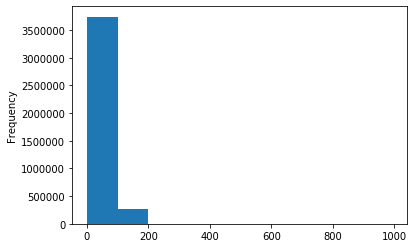

In [11]:
df_val['Text_tokens_count'].plot(kind='hist')

In [12]:
df_val['Text_tokens'].value_counts()[:10]

101|100|102                                                                                                                                                                                                                                            14976
101|102                                                                                                                                                                                                                                                  768
101|9670|27023|61439|9568|119081|31503|137|118|137|106|114|14120|131|120|120|188|119|11170|120|171|12396|11403|10107|10884|10686|10350|10858|10638|102                                                                                                   411
101|9426|12508|25503|14120|131|120|120|188|119|11170|120|147|13520|11703|11565|13034|14703|11779|90772|102                                                                                                                                       

## TweetID

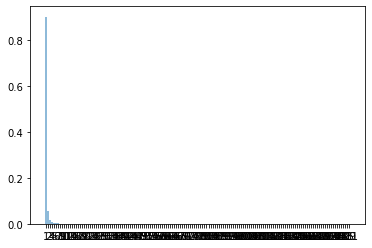

In [13]:
tweet_occ = df_val['Tweet_id'].value_counts().values
labels, counts = np.unique(tweet_occ, return_counts=True)
tot_el = counts.sum()
counts = [i / tot_el for i in counts]
y_pos = np.arange(len(labels))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

## Present links
Nota: si potrebbe costruire una feature a partire da un link che si ripete più volte
* File Feature per Link

In [14]:
df_val['Present_links'].value_counts()[:10]

0                                   3419271
E522B6C629B01DA6B29DE65BF5DFA55B        924
979B4F7F5C3B6AC61479D7E0070A2D17        869
140BCA0056E50C79778369C95D6DDC63        379
6F4FC1683D0D6FEC76DDBE6C699BCF10        348
52B4B186BC13C290B696BD5D304DA89A        273
180511B4A939ADAD39FDB6604C1A9AC5        261
4A939FCEAF42B180561F4B7D8ACE2406        260
608B880AE03A9C931AEF7F855D0118B4        252
FF3D932C8BDCBC65A6D0A834418B03FB        245
Name: Present_links, dtype: int64

## Tweet Type

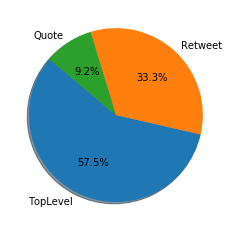

In [4]:
labels = df_val['Tweet_type'].value_counts().index.values
sizes = df_val['Tweet_type'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

### Possible dataleak

* Prendo tutti gli autori che sono anche user
* Filtro per gli autori che hanno condiviso un tweet di tipo Retweet
* Vado ad analizzare tra questi autori, l'azione precedente che hanno fatto, se i tweet corrispondono è un retweet
* In questo caso vado a prendere i retweet dei retweet, posso pulire i due token iniziali e vedere se il testo corrisponde

In [15]:
from pytorch_pretrained_bert import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased',
                                          do_lower_case=False)

In [16]:
def split_tokens(text_tokens):
    indexed_tokens = []
    text_tokens = text_tokens.rstrip("\n")
    indexed_tokens = text_tokens.split("|")
    indexed_tokens = list(map(int, indexed_tokens))
    return indexed_tokens

In [24]:
def from_token_to_text(text_tokens, print_token=True):
    '''
        Example of input
        import simo_recsys20_utilities.py as sru
        # open csv with pandas and store it as dataframe
        filename = "training_chunk_0.csv"
        dataset = pd.read_csv(filename)
        # print(dataset.head()) # serve a vedere come sono strutturati
        # in text_tokens salviamo il dato come ci viene fornito dalla challenge
        # ovvero la lista di bert token separati da | come stringa
        text_tokens = dataset.iloc[758, 0]
        # print("Text tokens: ", text_tokens)
        original_tweet = sru.from_token_to_text(text_tokens, print_token=False)
    '''
    text_token_list = []
    # rimozione \n poi facciamo una lista di token string
    # infine trasformiamo le stringhe in interi (indici nel vocabolario)
    text_token_list = split_tokens(text_tokens)
    #if(print_token is True):
    #    print("Text token list: ", text_token_list)
    # ora la funzione che converte la lista di token in una stringa
    # ovvero nel tweet testuale originale
    token_list = text_token_list
    # print(list(tokenizer.vocab.keys())[token_list])
    original_tweet = ""
    flag = 0
    for token in token_list:
        # print(list(tokenizer.vocab.keys())[token])
        text_token = list(tokenizer.vocab.keys())[token]
        # print(text_token)
        flag += 1  # check if first token
        # gestione della spaziatura e ricostruzione word splitting
        if flag > 1:
            if len(text_token) > 2:  # caso token da word splitting
                if text_token[1] == "#":
                    text_token = text_token[2:]
                    original_tweet = original_tweet + text_token
                else:  # caso tweet mentions and tweet hashtag
                    if original_tweet[-1] == "@" or original_tweet[-1] == "#":
                        original_tweet = original_tweet + text_token
                    else:
                        original_tweet = original_tweet + " " + text_token
            else:
                if original_tweet[-1] == "@" or original_tweet[-1] == "#":
                    original_tweet = original_tweet + text_token
                else:
                    original_tweet = original_tweet + " " + text_token
        else:
            original_tweet = original_tweet + text_token
    print(original_tweet)
    return original_tweet


In [41]:
df_val

,Text_tokens,Hashtags,Tweet_id,Present_media,Present_links,Present_domains,Tweet_type,Language,Timestamp,User_id,Follower_count,Following_count,Is_verified,Account_creation_time,User_id_engaging,Follower_count_engaging,Following_count_engaging,Is_verified_engaging,Account_creation_time_engaging,Engagee_follows_engager
0,101|47185|10157|100986|10343|55422|119|14120|1...,0,7647B4E9DAF4C1D8973397DC2A04F3E3,Photo,0,0,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581703126,8A9AB92B775C62C4AB60DF6773A01571,13941,1216,0,1448292186,0000006C3074607050F1339DDCB890BB,27448,600,0,1520948869,True
1,101|56898|137|10730|107105|59578|17394|17394|1...,0,408DB1803264B5FF55F73EC06BE9BD77,Photo|Photo|Photo|Photo,0,0,Retweet,B9175601E87101A984A50F8A62A1C374,1582021842,825B003667DF15692B1704F44DAFD1A2,186,100,0,1263078566,000013315386492275CCBF7AEF293EF0,139,956,0,1335110299,False
2,101|16735|11584|131|14120|131|120|120|188|119|...,0,2EE951379C47E8BF62EABB8FA027F753,GIF,0,0,TopLevel,2996EB2FE8162C076D070A4C8D6532CD,1581734918,2DEC09796D0EB473244CB7A4FB13A0A0,250470,1,0,1356488269,00001569CB28972FC8173122D9DA162F,16,97,0,1503940711,False
3,101|56898|137|12127|43213|10245|168|10215|1011...,0,2135F24B05DAE3EF213F9CE80FDC6DAF,Photo|Photo|Photo,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581913613,487BCB8F1677A6D9EEE612940410CBB6,516,406,0,1449096567,00001607209C5774DF9207A2AC0EED5F,460,693,0,1396311956,True
4,101|11101|42780|10741|11222|10197|15304|10106|...,0,09143FEDE9BD494A6EA9A7EE160565E3,Photo,0,0,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581565745,C85C39DC8D279E51DF1BBF0391E5EB2E,19576,273,1,1236181798,0000177705514C315F2FC6DFA3872712,468,3837,0,1298646801,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,101|56898|137|10204|79679|12111|10350|131|146|...,0,C65A5A74C6E5810501CF30BD3BF825B0,0,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581614087,2DCED30E4D67B27A5874CEB8E63FE625,11733,571,0,1305141321,72327B3F146B5C5A627C4F1E85351692,373,577,0,1258558029,False
1999996,101|100|10473|10104|137|12237|90861|11517|4367...,0,E2B63427B43D93D7DBCA242D00EC5115,Video,0,0,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1582013876,939A5CA01DF2B025CD6FD054AA0E945A,567214,79,1,1345370088,72328155241589DCFA8CCDC2DEB5C123,47,127,0,1545735261,False
1999997,101|16411|62512|10119|13065|11266|10192|10126|...,0,590A0F35AD1B3C66BBF1B75320E3C015,0,0,0,TopLevel,06D61DCBBE938971E1EA0C38BD9B5446,1581982281,2115D89715A50705654C4D960E47817D,25944,11755,0,1461285098,723284783D0278E88F3A0920CAFCAB38,355,1024,0,1457741297,True
1999998,101|11065|21852|10479|10139|10165|13136|169|19...,0,BDA3A52510FC1B636BD5205D229B23AC,0,0,0,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581972435,C644A7FA3BBAE3EF41ED23631BEA44E7,67105,1300,0,1328391052,72328B0C9C0D4EB057C0755709D947CF,11,105,0,1501280349,False


In [ ]:
df_solo_retweet = df_val[df_val['Tweet_type'] == 'Retweet']
df_solo_retweet['Text_tokens'] = df_solo_retweet['Text_tokens'].apply(lambda x: from_token_to_text(x, print_token=False))
df_solo_retweet

In [ ]:
df_solo_retweet.head()

In [8]:
# Tutti gli autori che hanno condiviso un tweet
df_double = df_val[df_val['User_id'].isin(df_val['User_id_engaging'])]
# Tra questi autori -> Quanti hanno pubblicato un tweet di tipo retweet?
#retweet = df_double[df_double['Tweet_id'].isin(df_double[df_double['Tweet_type'] == 'Retweet']['Tweet_id'])].groupby('Tweet_id').count()
retweet = df_double[df_double['Tweet_type'] == 'Retweet']
retweet

,Text_tokens,Hashtags,Tweet_id,Present_media,Present_links,Present_domains,Tweet_type,Language,Timestamp,User_id,Follower_count,Following_count,Is_verified,Account_creation_time,User_id_engaging,Follower_count_engaging,Following_count_engaging,Is_verified_engaging,Account_creation_time_engaging,Engagee_follows_engager
171,101|56898|137|148|11259|11779|168|69342|82834|...,0,3AB339B47A286CA9AAB7071143144562,0,0,0,Retweet,06D61DCBBE938971E1EA0C38BD9B5446,1581734997,2E7E5EA523C5889F4FEDE5A64CD39C3D,2365,2405,0,1530508247,00028D01F5157B58C170B17CBDAC67D7,28,65,0,1460517180,True
177,101|56898|137|91793|50924|11396|39900|11305|10...,F20A0D2F5351CCC5D0A3E1CBAB4D4063,98B37FB23646229A871D6163EDBACB43,Photo|Photo|Photo,0,0,Retweet,22C448FF81263D4BAF2A176145EE9EAD,1581981252,2A8915F8B0E27ACAF5387979FEC3B0B7,902,70,0,1499270493,0002A3D7A02C1D269FD136500342C274,5,50,0,1542378698,False
313,101|56898|137|23154|10858|15171|10567|131|1831...,0,EC6124B4FB668B8C9681769D556F1809,0,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581863045,364643567399DD288ECCD136E48CD0BA,462221,3047,1,1231714547,000444480B48C160E2C5692B1A2BD0F4,441,932,0,1369160489,False
361,101|56898|137|14382|84105|25134|11244|131|1980...,0,05E531913EFD9DB40688EAFAB2D0DF4B,0,0,0,Retweet,06D61DCBBE938971E1EA0C38BD9B5446,1581860704,1FFCA9BE3D536C662173C5210BE8E061,11475,3519,0,1341612037,0004D0532E4052EA04A0CDFCE81B9F49,84,166,0,1242866072,False
371,101|56898|137|33148|12396|14590|10410|10550|13...,0,3A1F3162FF66C5138E74436C55D251FA,0,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1582064207,196D1D4D76E0964AC10306BEFBBE7C1B,721577,5524,1,1230670217,0004FBF4456C46A922D82DF045FD62D1,50,304,0,1381442850,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999540,101|56898|137|183|50135|17019|22882|10229|131|...,0,E38C143C53447C2323A5719E78545698,0,2311815C0150A835656DCC4C3C7E4176,FECA6F2E8244F2294BD2CE957C0602A9,Retweet,22C448FF81263D4BAF2A176145EE9EAD,1582076588,357CE79689FC1662594627DA620F9FDC,5202,5721,0,1496050971,38FBBB5C198B2DFCBBD0FAAD18EBF3AF,236,297,0,1292650388,True
999849,101|56898|137|100446|131|23789|13193|10196|105...,0,177279B00A7E4FC6A1C3B84BA05356EC,0,0,0,Retweet,FF60A88F53E63000266F8B9149E35AD9,1582154495,306B52A4B3FE27494AB0F92387A856BA,20113,1726,1,1243627409,390011AF55A87D1D28C95D337B7911C9,522,240,0,1278337225,False
999875,101|56898|137|19448|53460|49167|13268|131|2187...,0,19BA25F26BE87C2634E8300BA4043AF9,0,0,0,Retweet,22C448FF81263D4BAF2A176145EE9EAD,1581575917,083DF3F531CAEA4A9EEB06CF72ADC905,9357,10215,0,1572356302,39009CB8FBC6733D63791FDCBCD2BE96,14416,15766,0,1552032077,True
999921,101|56898|137|10105|13581|10162|13387|85649|13...,0,C60DA407288F15E059823A84D88FFFB3,0,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1582140837,3171B25F3CDD85079B69BED84C3E3495,21905,22558,0,1469644281,39011D457A99EB94D47D318B458E7340,10181,10412,0,1496509839,True


In [9]:
from_token_to_text(retweet['Text_tokens'].values[0].replace('101|56898|', ''))

NameError: name 'from_token_to_text' is not defined

In [56]:
from_token_to_text(retweet['Text_tokens'].values[0])

Text token list:  [101, 56898, 137, 15033, 10403, 15926, 14403, 131, 182, 18443, 10107, 102]
[CLS] RT @milaswifi : nbts [SEP]


'[CLS] RT @milaswifi : nbts [SEP]'

In [57]:
df_compare = retweet.merge(df_val[['User_id_engaging', 'Tweet_id', 'Text_tokens']], left_on='User_id', right_on='User_id_engaging', suffixes=('_attuale', '_prec'))

In [58]:
df_compare['Text_tokens_prec'] = df_compare['Text_tokens_prec'].apply(lambda x: x.replace('101|', ''))
df_compare['Text_tokens_attuale'] = df_compare['Text_tokens_attuale'].apply(lambda x: x.replace('101|56898|', ''))

In [59]:
df_compare[['Text_tokens_prec', 'Text_tokens_attuale']]

,Text_tokens_prec,Text_tokens_attuale
0,11399|10435|17446|108|63991|93302|10320|11263|...,137|15033|10403|15926|14403|131|182|18443|1010...
1,146|145|32071|11259|34875|10824|10162|117|1027...,137|148|11259|11779|168|69342|82834|55538|5218...
2,146|145|32071|11259|34875|10824|10162|117|1027...,137|15838|42880|10756|52302|72078|131|14027|76...
3,146|145|32071|11259|34875|10824|10162|117|1027...,137|51057|11779|10400|35327|11011|131|17144|10...
4,20698|13913|18872|4388|6006|1939|1881|3396|194...,137|91793|50924|11396|39900|11305|105744|131|2...
...,...,...
88863,10243|108|28320|10707|35401|10187|48435|10209|...,137|141|38732|13420|11396|11396|131|33974|1281...
88864,56898|137|25942|42838|10123|131|145|25054|1744...,137|109601|18545|13321|131|10211|11005|72453|2...
88865,56898|137|14900|60911|10245|34891|10107|131|10...,137|109601|18545|13321|131|10211|11005|72453|2...
88866,56898|137|80677|168|182|10162|168|25961|10107|...,137|10141|20572|10330|10575|55692|131|11590|12...


In [60]:
df_compare[df_compare['Text_tokens_attuale'] == df_compare['Text_tokens_prec']]

,Text_tokens_attuale,Hashtags,Tweet_id_attuale,Present_media,Present_links,Present_domains,Tweet_type,Language,Timestamp,User_id,...,Account_creation_time,User_id_engaging_attuale,Follower_count_engaging,Following_count_engaging,Is_verified_engaging,Account_creation_time_engaging,Engagee_follows_engager,User_id_engaging_prec,Tweet_id_prec,Text_tokens_prec


## User follow the author

In [ ]:
labels = df_val['Engagee_follows_engager'].value_counts().index.values
sizes = df_val['Engagee_follows_engager'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()